# Simple Techniques for Resampling Data 
# for Frequency Domain Analysis of Heart Rate Variability

In [1]:
# Imported packages
import numpy as np
import numpy.fft as fft
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.signal as signal
import pandas as pd
import statistics
import math
from scipy.interpolate import CubicSpline

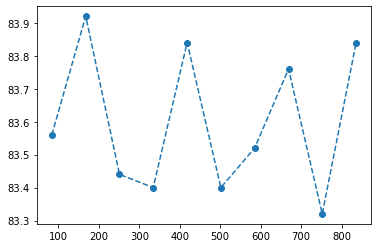

In [13]:
# Sample RR intervals from a mouse, in milliseconds
rr_intervals = [83.56, 83.92, 83.44, 83.4, 83.84, 83.4, 83.52, 83.76, 83.32, 83.84]
resample_length = 20 # in milliseconds

# Initialize time points
rr_time_points = []
last_time_point = 0
for rr in rr_intervals:
    time_point = last_time_point + rr
    rr_time_points.append(time_point)
    last_time_point = time_point
source_data = [rr_time_points, rr_intervals]
plt.plot(source_data[0], source_data[1], 'o--')

resampled_time_points = []
this_sample_time = 0
last_sample_time = 0
while this_sample_time <= last_time_point:
    resampled_time_points.append(this_sample_time)
    this_sample_time = last_sample_time + resample_length
    last_sample_time = this_sample_time

In [15]:
resampled_data_points = []
low_start_index = 0
low_time_point = -1
low_index = -1
for x in resampled_time_points:
    # Find the time point that is closest to this point.
    inx = low_start_index
    while rr_time_points[inx] < x:
        inx += 1  # inx is the index of the next time point higher than the resampled time point
    high_index = inx
  
    # get the high data value
    y2 = rr_intervals[high_index]
    x2 = rr_time_points[high_index]
    # Handle the special condition of the resampled points before the first RR interval
    #print ("High Index:\t" , high_index, "\nLow Index: \t", low_index) 
    x1 = rr_time_points[high_index-1]
    y1 = rr_intervals[high_index-1]  
        
    # interpolateresampled value
    y = y1 + ((y2-y1)/(x2-x1)) * (x-x1)
    resampled_data_points.append(y)
    


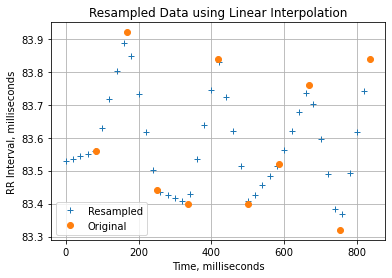

In [16]:
# Plot the results    
fig, ax = plt.subplots()  # Create a figure and an axes.       
ax.plot(resampled_time_points, resampled_data_points, "+", label = "Resampled")
ax.plot(rr_time_points,rr_intervals, "o" , label = "Original")
ax.set_xlabel('Time, milliseconds')  # Add an x-label to the axes.
ax.set_ylabel('RR Interval, milliseconds')  # Add a y-label to the axes.
ax.set_title("Resampled Data using Linear Interpolation")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.grid()

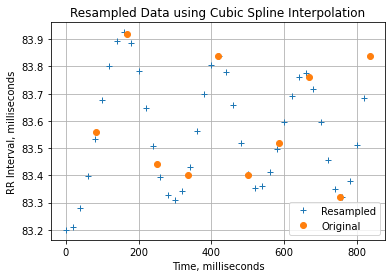

In [17]:
f = CubicSpline(rr_time_points, rr_intervals, bc_type='natural')
x = rr_time_points
y = rr_intervals
x_new = resampled_time_points
y_new = f(resampled_time_points)

fig, ax = plt.subplots()  # Create a figure and an axes.       
ax.plot(x_new, y_new, "+", label = "Resampled")
ax.plot(x,y, "o" , label = "Original")
ax.set_xlabel('Time, milliseconds')  # Add an x-label to the axes.
ax.set_ylabel('RR Interval, milliseconds')  # Add a y-label to the axes.
ax.set_title("Resampled Data using Cubic Spline Interpolation")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.grid()

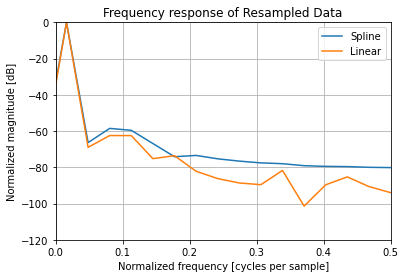

In [18]:
pts = 32 # size of the FFT in number of points

A_linear = fft(resampled_data_points, pts) / (len(resampled_data_points)/2.0)
response_linear = 20 * np.log10(np.abs(fftshift(A_linear / abs(A_linear).max())))

A_spline = fft(y_new, pts) / (len(y_new)/2.0)
response_spline = 20 * np.log10(np.abs(fftshift(A_spline / abs(A_spline).max())))

freq = np.linspace(-0.5, 0.5, len(A_spline))

fig, ax = plt.subplots()  # Create a figure and an axes.       
plt.axis([0, 0.5, -120, 0])
ax.plot(freq, response_spline, label = "Spline")
ax.plot(freq, response_linear, label = "Linear")
ax.set_xlabel('Normalized frequency [cycles per sample]')  # Add an x-label to the axes.
ax.set_ylabel('Normalized magnitude [dB]')  # Add a y-label to the axes.
ax.set_title("Frequency response of Resampled Data")  # Add a title to the axes.
ax.legend()  # Add a legend.
ax.grid()